In [1]:
import os
import pandas as pd
import math

# COMBINATION
comb = 'Co3'

# folder path
dir_path  = '/media/cecilia/DISCO2/mogp_with_terms_results/'+comb+ "/"
save_path = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/'

topicos = os.listdir(dir_path)

#test
#topicos = [topicos[0], topicos[1]]
print(topicos)

['1', '134', '187', '215', '221', '25', '259', '289', '350', '363', '37', '403', '418', '428', '465', '476', '528', '529', '537', '538', '556', '561', '58', '586', '99']


GLOBAL RECALL 

ES POBLACIONAL - NO SE NECESITA PROMEDIAR LA POBLACION

In [2]:
df_ave_data = pd.DataFrame(columns=['topic', '1','2','3', '4', '5'])

for t in topicos:    
    files = os.listdir( "".join( [dir_path,"/", t]))
        
    # inserto nro de topico
    row = [t]

    for f in sorted(files):
        if "_EVALUATION_GEN_1__globalRecall.txt" in f:
                        
            run = f.split('_')[1] # nro de run
            path_pr = "".join([dir_path,"/", t,"/", f])
            
            # read text file into pandas DataFrame
            df_metric = pd.read_csv(path_pr, header=None, sep='\s+')
                                            
            mean = df_metric.mean(numeric_only=True, axis=0)

            # mean es un df, asi que acceder a columna 0
            row.append(mean[0])            
    
    
    # df con promedio de la ultima poblacion de Global Recall de cada corrida para cada topico
    # en realidad como es poblacional es 1 solo valor por corrida
    #    topic     1      2       3           4      5        
    #     1       0.893939  0.904040  0.888889  0.888889  0.929293
    #     134     0.966006  0.943343  0.951841  0.971671  0.977337
    df_ave_data = pd.concat([pd.DataFrame([row], columns=df_ave_data.columns), df_ave_data], ignore_index=True)



# set the 'topic' column as index
df_ave_data.set_index('topic', inplace=True)
df_ave_data = df_ave_data.sort_values(by='topic', ascending=True)

df_ave_data = df_ave_data.transpose()
df_ave_data.to_csv(save_path + 'co3_globalRecall_evaluation_by_run_gen_1.csv')

df_ave_data

topic,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
1,0.838384,0.858357,0.881633,0.730769,0.609058,0.9375,0.632479,0.705882,0.931034,0.786802,...,0.708333,0.756522,0.754386,0.717391,0.804029,0.705521,0.815534,0.543509,0.602241,0.573333
2,0.838384,0.858357,0.877551,0.730769,0.697259,0.9375,0.623932,0.705882,0.931034,0.786802,...,0.750000,0.756522,0.754386,0.717391,0.813187,0.705521,0.815534,0.557775,0.602241,0.573333
3,0.838384,0.858357,0.873469,0.730769,0.705602,0.9375,0.649573,0.705882,0.931034,0.786802,...,0.729167,0.773913,0.754386,0.717391,0.776557,0.705521,0.815534,0.552068,0.602241,0.573333
4,0.838384,0.858357,0.853061,0.730769,0.715137,0.9375,0.641026,0.705882,0.931034,0.786802,...,0.750000,0.747826,0.754386,0.717391,0.816850,0.705521,0.815534,0.552068,0.602241,0.573333
5,0.848485,0.858357,0.873469,0.711538,0.707986,0.9375,0.606838,0.705882,0.931034,0.786802,...,0.750000,0.739130,0.754386,0.717391,0.829670,0.705521,0.815534,0.552068,0.602241,0.573333


In [3]:
stats_by_topic = df_ave_data.agg(['mean', 'count', 'std'])
stats_by_topic

,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
mean,0.840404,0.858357,0.871837,0.726923,0.687008,0.9375,0.630769,0.705882,0.931034,0.786802,...,0.737500,0.754783,0.754386,0.717391,0.808059,0.705521,0.815534,0.551498,0.602241,0.573333
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.0000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
std,0.004517,0.000000,0.011028,0.008600,0.044040,0.0000,0.016440,0.000000,0.000000,0.000000,...,0.018634,0.012898,0.000000,0.000000,0.019870,0.000000,0.000000,0.005104,0.000000,0.000000


In [4]:
stats_all_topics =stats_by_topic.transpose()
stats_all_topics

,mean,count,std
1,0.840404,5.0,0.004517
134,0.858357,5.0,0.000000
187,0.871837,5.0,0.011028
215,0.726923,5.0,0.008600
221,0.687008,5.0,0.044040
25,0.937500,5.0,0.000000
259,0.630769,5.0,0.016440
289,0.705882,5.0,0.000000
350,0.931034,5.0,0.000000
363,0.786802,5.0,0.000000


In [5]:

print(stats_all_topics['mean'].describe().transpose())


t = pd.DataFrame({  'mean_gr': [stats_all_topics['mean'].mean()],                    
                    'count_gr': [stats_all_topics['mean'].count()],
                    'std_gr': [stats_all_topics['mean'].std()]})

print(t)

ci95_hi = []
ci95_lo = []

m, c, s = t.loc[0]

ci95_hi.append(m + 1.96*s/math.sqrt(c))
ci95_lo.append(m - 1.96*s/math.sqrt(c))

t['ci95_lo_gr'] = ci95_lo
t['ci95_hi_gr'] = ci95_hi


t.to_csv(save_path + 'co3_globalRecall_evaluation_stats_gen_1.csv')
t

count    25.000000
mean      0.738476
std       0.113376
min       0.497959
25%       0.687008
50%       0.754386
75%       0.808059
max       0.937500
Name: mean, dtype: float64
    mean_gr  count_gr    std_gr
0  0.738476        25  0.113376


,mean_gr,count_gr,std_gr,ci95_lo_gr,ci95_hi_gr
0,0.738476,25,0.113376,0.694032,0.782919


Text(0.5, 0.98, 'Global Recall  - Co3')

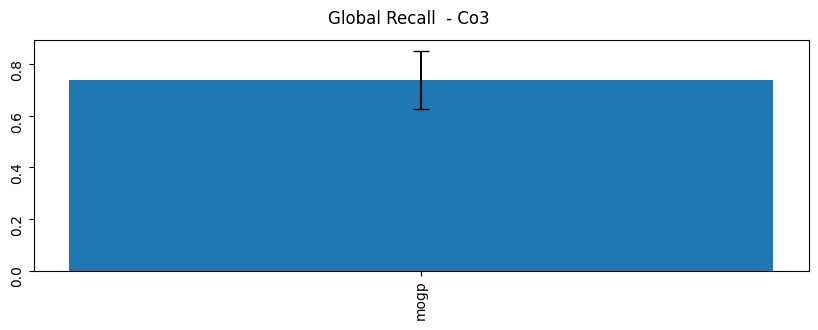

In [6]:
######### global ReCALL
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1,1, figsize=(10, 3), sharey=False)
axs.tick_params(labelrotation=90)
axs.bar('mogp', t['mean_gr'], yerr=t['std_gr'], capsize=6)

fig.suptitle('Global Recall  - '+ comb)